In [38]:
#Importing

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [39]:
#Loading Data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

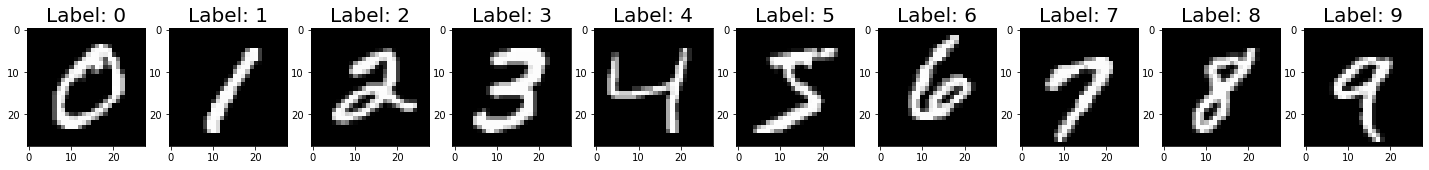

In [40]:
#Showcasing Data

quantity = 10

f, ax = plt.subplots(1, quantity, figsize=(25,25))
for i in range(quantity):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=20)

In [41]:
#Onehotencoding and #ormalizing

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = x_train/255
x_test = x_test/255

x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [42]:
#Building model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))


model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [43]:
#Fit and evaluate model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=10,  validation_split=0.2)

model.evaluate(x_test,y_test)

Epoch 1/10
750/750 [==============================] - 21s 28ms/step - loss: 0.2076 - accuracy: 0.9361 - val_loss: 0.0731 - val_accuracy: 0.9783
Epoch 2/10
750/750 [==============================] - 23s 30ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.0468 - val_accuracy: 0.9861
Epoch 3/10
750/750 [==============================] - 22s 30ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0401 - val_accuracy: 0.9881
Epoch 4/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0399 - val_accuracy: 0.9889
Epoch 5/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0404 - val_accuracy: 0.9891
Epoch 6/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 7/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0371 - val_accuracy:

[0.029286978766322136, 0.9904000163078308]

In [44]:
#Save model

model.save('model.h5')

313/313 [==============================] - 2s 5ms/step


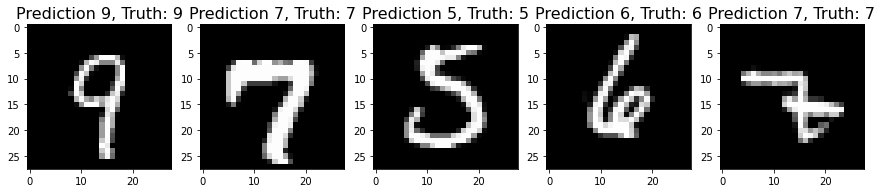

In [45]:
#Visual Evaluation of samples

predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions,axis=1)

Frames = 5

f, ax = plt.subplots(1,Frames,figsize=(15,15))

for i in range(Frames):
    random_idx = np.random.choice(len(x_test))
    x_sample = x_test[random_idx]
    y_true = np.argmax(y_test, axis=1)
    y_sample_truth = y_true[random_idx]
    y_sample_predicted_class = predictions_classes[random_idx]



    ax[i].set_title("Prediction {}, Truth: {}".format(y_sample_predicted_class, y_sample_truth), fontsize=16)
    ax[i].imshow(x_sample.reshape(28,28),cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

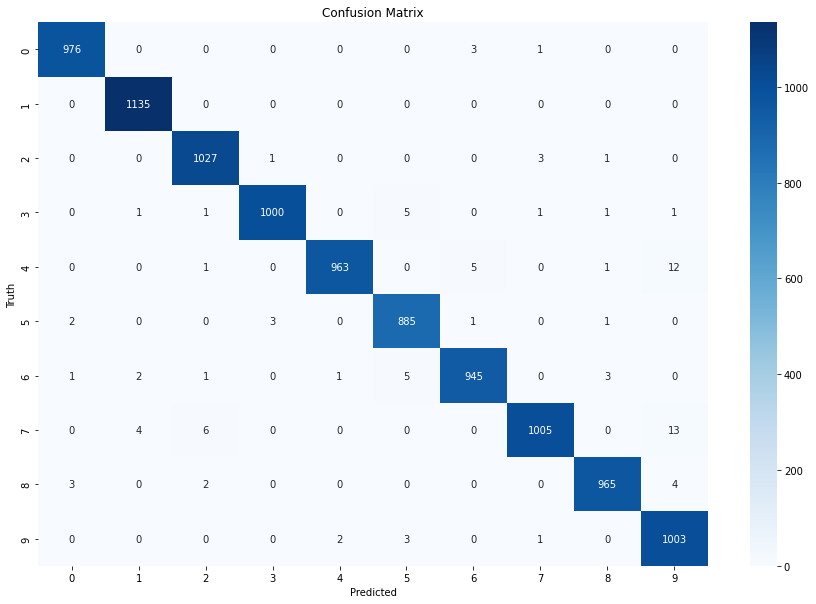

In [46]:
#Visual Evaluation of entire dataset

confusion_matrix = confusion_matrix(y_true, predictions_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues")
ax.set_xlabel("Predicted")
ax.set_ylabel("Truth")
ax.set_title("Confusion Matrix")
